<a href="https://colab.research.google.com/github/argxsL/CCMACLRL_EXERCISES_COM231ML/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [ ]:
# Converts csv to dataframe
df = pd.read_excel('./DataDocx.xlsx')

df.head()

,ID,Name,ShareFrequency,Active,Replies,Connections,Personality
0,1,Johanna,1,1,1,827,0
1,2,Lynn,1,1,1,928,0
2,3,Aubrey,0,1,1,1100,1
3,4,Jonablle,1,1,1,200,1
4,5,Julian,1,1,1,286,1


Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              100 non-null    int64 
 1   Name            100 non-null    object
 2   ShareFrequency  100 non-null    int64 
 3   Active          100 non-null    int64 
 4   Replies         100 non-null    int64 
 5   Connections     100 non-null    int64 
 6   Personality     100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


Display the total number of samples from each label using `.value_counts()`

In [ ]:
df['Personality'].value_counts()

,count
Personality,
1,60
0,40


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

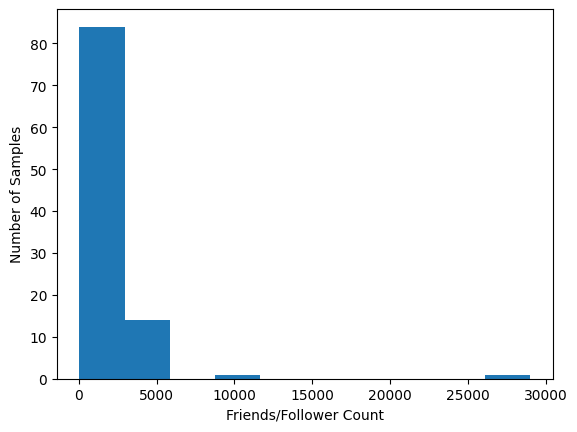

In [ ]:
plt.hist(df["Connections"])
plt.xlabel("Friends/Follower Count")
plt.ylabel("Number of Samples")
plt.show()

Remove the name column using `drop()` method

In [ ]:
# Removes Id column
df.drop(columns='ID', inplace=True)
# Removes Name column
df.drop(columns='Name', inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
# Array of features
X = df.drop(columns=['Personality']).values


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:

# Array of Labels
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)


Display the dimensions of each variables using `.shape()`

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [ ]:
# Test the model
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

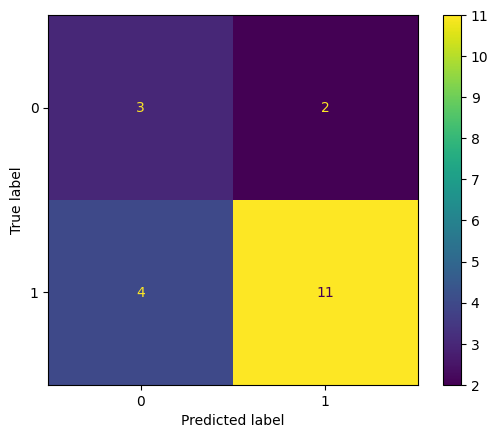

In [ ]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7

Display the precision

In [ ]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.6        0.73333333]


Display the recall

In [ ]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.42857143 0.84615385]


Display the f1-score

In [ ]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.5        0.78571429]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

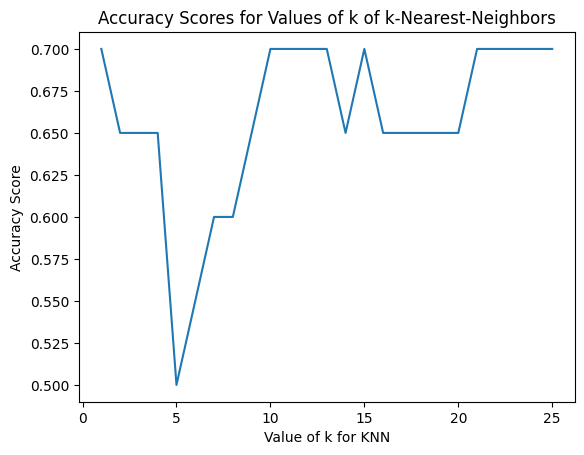

In [ ]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[0, 0, 113, ]])